In [589]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import sklearn
import os
import joblib



In [590]:
os.getcwd()

'C:\\Users\\DELL\\Desktop\\TECHTERN 01\\New Heart Attact modelling'

In [591]:
os.chdir(r"C:\Users\DELL\Desktop\TECHTERN 01\New Heart Attact modelling")

In [592]:
data = pd.read_csv('data/heart.csv')

In [593]:
data.head(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [594]:
#checking at the tail of the data
data.tail(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
283,40,1,0,152,223,0,1,181,0,0.0,2,0,3,0
284,61,1,0,140,207,0,0,138,1,1.9,2,1,3,0
285,46,1,0,140,311,0,1,120,1,1.8,1,2,3,0
286,59,1,3,134,204,0,1,162,0,0.8,2,2,2,0
287,57,1,1,154,232,0,0,164,0,0.0,2,1,2,0
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0
289,55,0,0,128,205,0,2,130,1,2.0,1,1,3,0
290,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
291,58,1,0,114,318,0,2,140,0,4.4,0,3,1,0
292,58,0,0,170,225,1,0,146,1,2.8,1,2,1,0


In [595]:
#Taking a 20 sample of the data
data.sample(20)

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
188,50,1,2,140,233,0,1,163,0,0.6,1,1,3,0
214,56,1,0,125,249,1,0,144,1,1.2,1,1,2,0
235,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
131,49,0,1,134,271,0,1,162,0,0.0,1,0,2,1
154,39,0,2,138,220,0,1,152,0,0.0,1,0,2,1
56,48,1,0,122,222,0,0,186,0,0.0,2,0,2,1
168,63,1,0,130,254,0,0,147,0,1.4,1,1,3,0
12,49,1,1,130,266,0,1,171,0,0.6,2,0,2,1
21,44,1,2,130,233,0,1,179,1,0.4,2,0,2,1
159,56,1,1,130,221,0,0,163,0,0.0,2,0,3,1


In [596]:
#checking for the structure of the data

In [597]:
#checking the data size
data.size

4242

In [598]:
#checking the data shape
data.shape

(303, 14)

In [599]:
#inspect for 

In [600]:
#checking the data information
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trtbps    303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalachh  303 non-null    int64  
 8   exng      303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slp       303 non-null    int64  
 11  caa       303 non-null    int64  
 12  thall     303 non-null    int64  
 13  output    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [601]:
#checking for data inbalance
data.output.value_counts()

output
1    165
0    138
Name: count, dtype: int64

In [602]:
#building function for checking variablelabel
def variableviewer(data):
    cols = list(data.columns)
    for col in cols:
        lblvierwer = print(col, data[col].unique())
    return lblvierwer

In [603]:
variableviewer(data)

age [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
sex [1 0]
cp [3 2 1 0]
trtbps [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 102 152 101 132 148 178 129 180 136 126 106
 156 170 146 117 200 165 174 192 144 123 154 114 164]
chol [233 250 204 236 354 192 294 263 199 168 239 275 266 211 283 219 340 226
 247 234 243 302 212 175 417 197 198 177 273 213 304 232 269 360 308 245
 208 264 321 325 235 257 216 256 231 141 252 201 222 260 182 303 265 309
 186 203 183 220 209 258 227 261 221 205 240 318 298 564 277 214 248 255
 207 223 288 160 394 315 246 244 270 195 196 254 126 313 262 215 193 271
 268 267 210 295 306 178 242 180 228 149 278 253 342 157 286 229 284 224
 206 167 230 335 276 353 225 330 290 172 305 188 282 185 326 274 164 307
 249 341 407 217 174 281 289 322 299 300 293 184 409 259 200 327 237 218
 319 166 311 169 187 176 241 131]
fbs [1 0]
restecg

In [604]:
'''#building a pipeline for extracting object variables
def catdfSelector(data):
    catver = list(data.select_dtypes('object').columns)
    catDf = data.select_dtypes('object')
    return catver,catDf'''

"#building a pipeline for extracting object variables\ndef catdfSelector(data):\n    catver = list(data.select_dtypes('object').columns)\n    catDf = data.select_dtypes('object')\n    return catver,catDf"

In [605]:
'''catver,catDf = catdfSelector(data)'''

'catver,catDf = catdfSelector(data)'

In [606]:
#checking at the statistical propertise of the data
data.describe()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [607]:
#checking for missing values
data.isna().sum()

age         0
sex         0
cp          0
trtbps      0
chol        0
fbs         0
restecg     0
thalachh    0
exng        0
oldpeak     0
slp         0
caa         0
thall       0
output      0
dtype: int64

In [608]:
#checking for duplicates
DUP = data[data.duplicated()]
DUP

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


<Figure size 1000x1500 with 0 Axes>

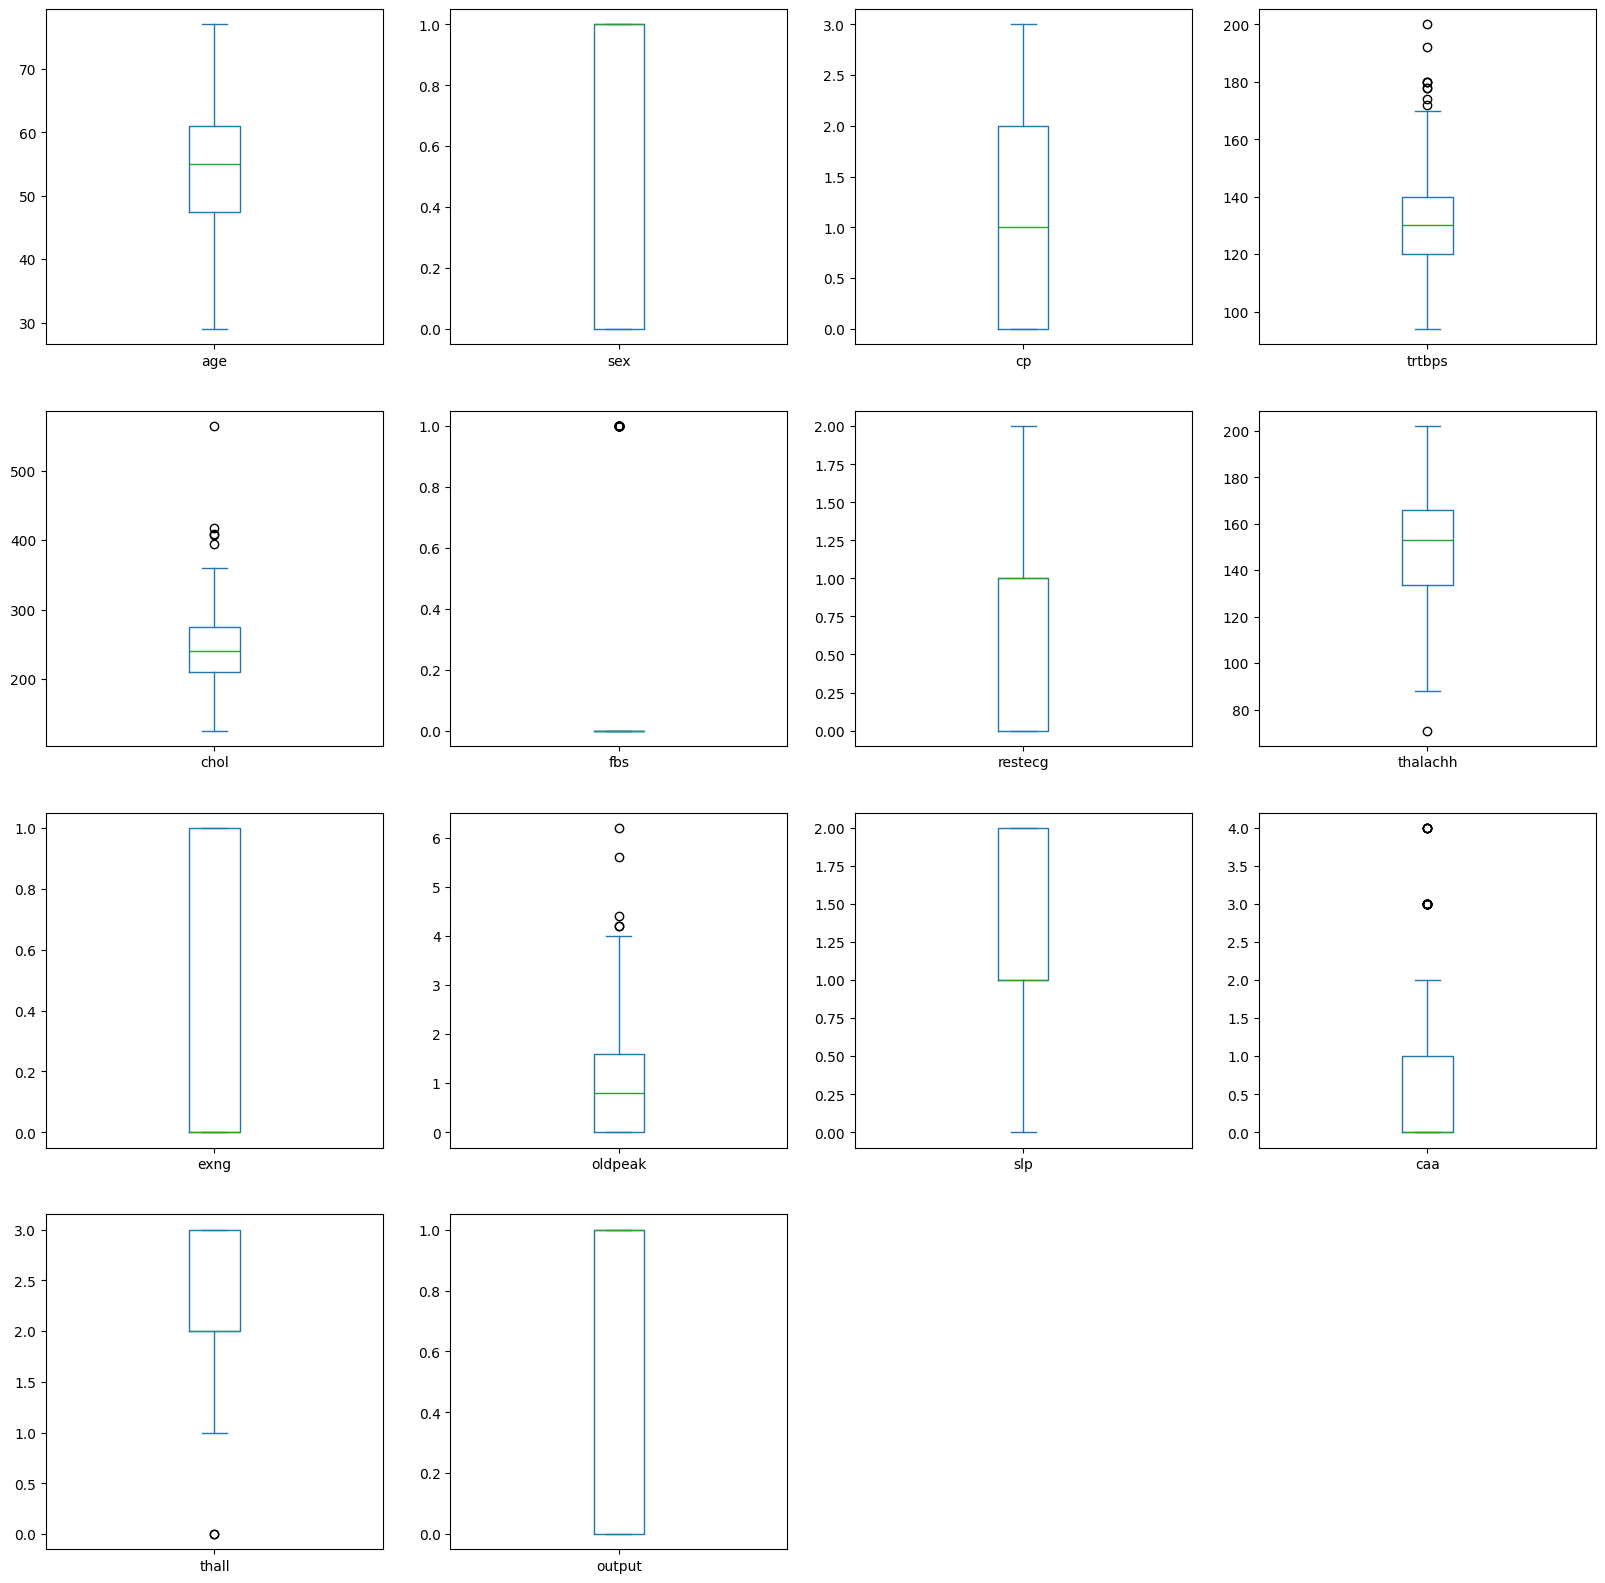

In [609]:
#plotting box plot to visualise the distribution of the data
plt.figure(figsize=(10,15))
data.plot(kind = 'box', subplots = True, layout= (4,4), sharey = False, sharex = False)
plt.gcf().set_size_inches(20,20)
plt.show()

<Figure size 1000x1500 with 0 Axes>

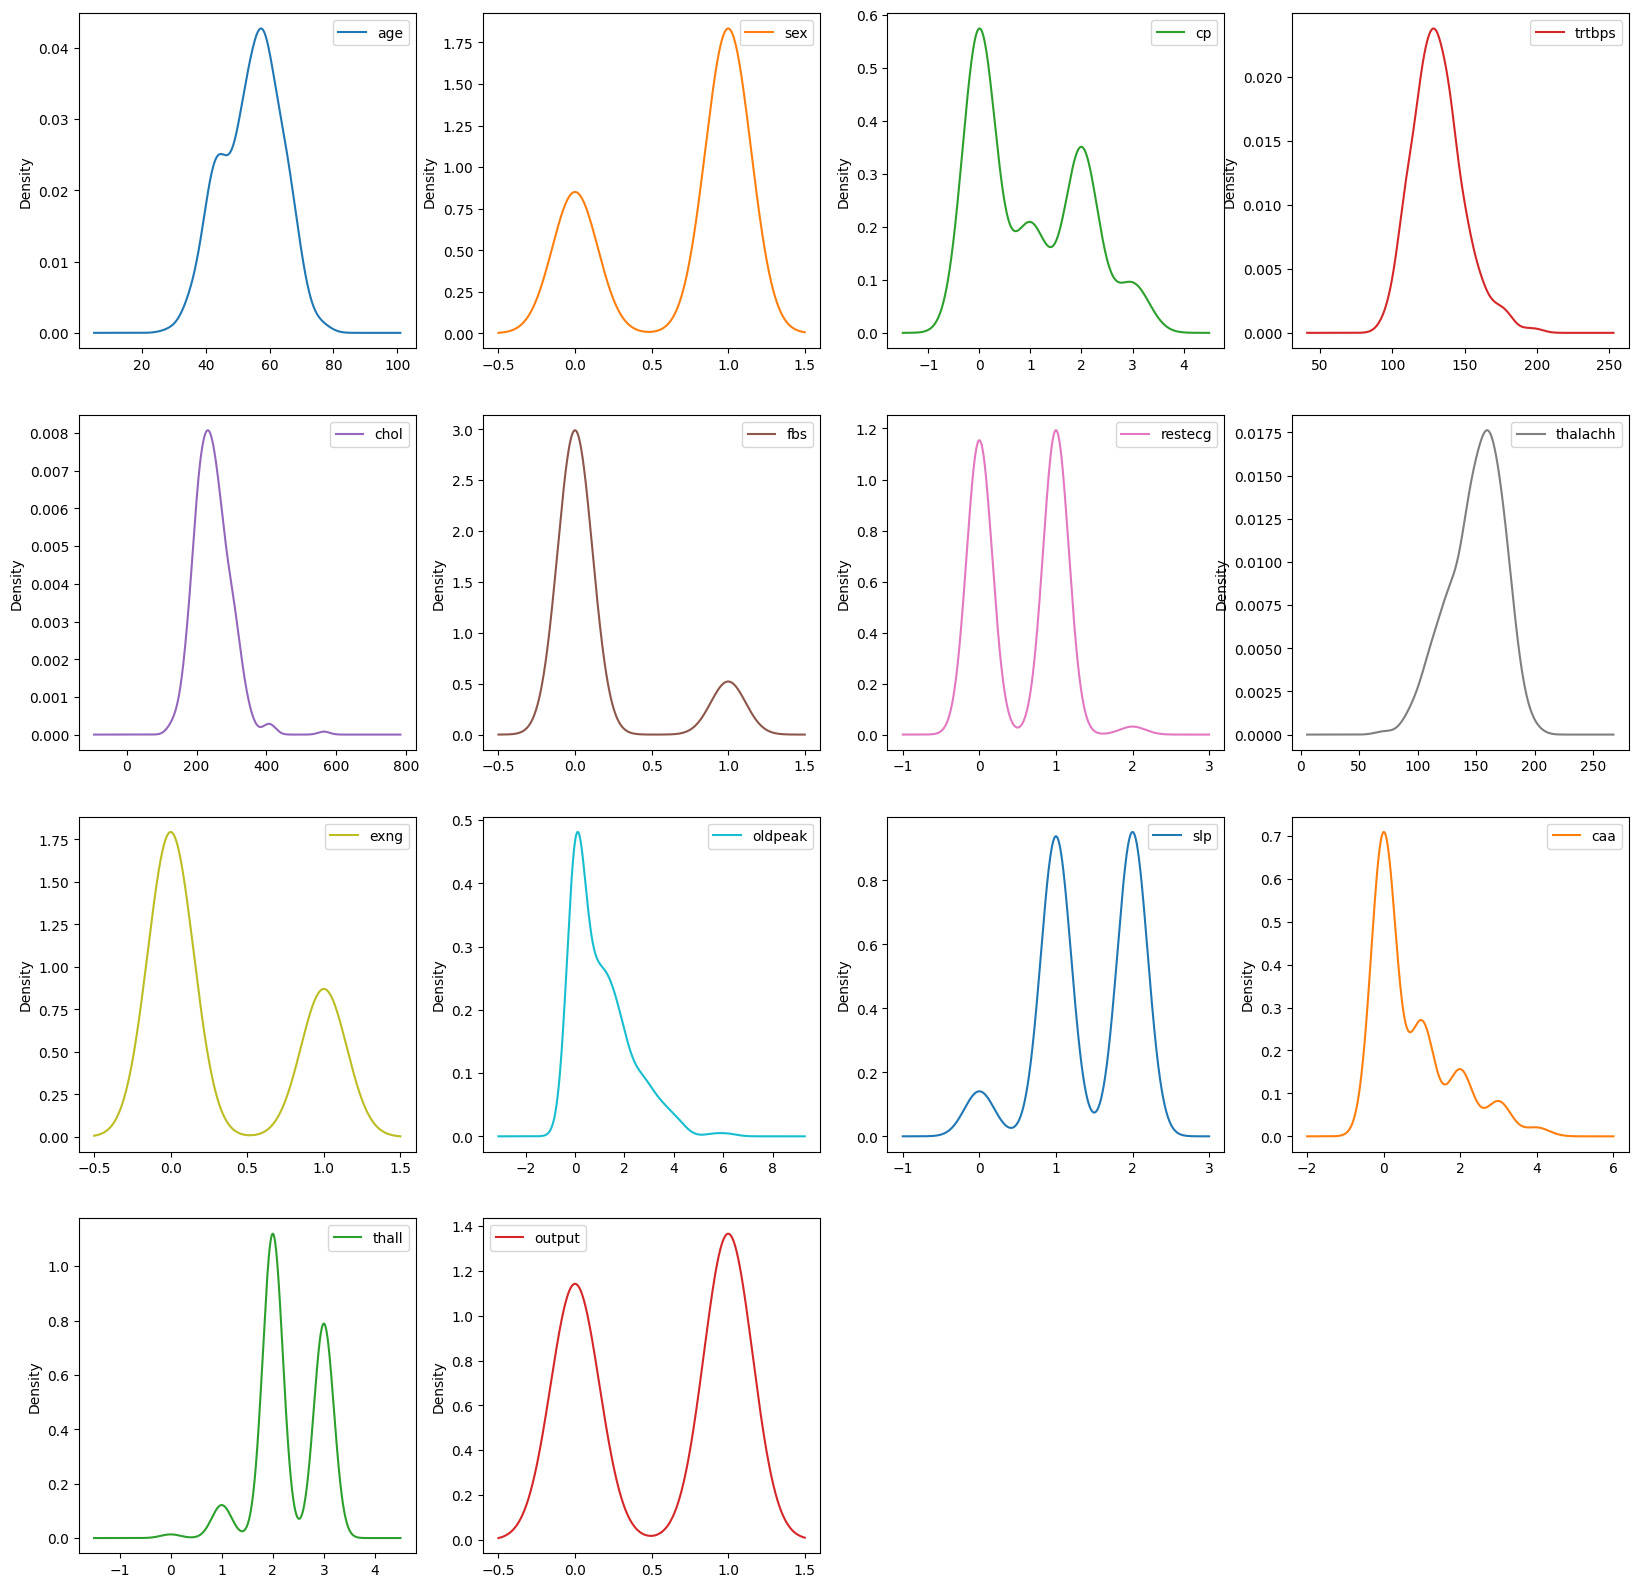

In [610]:
#plotting density plot to visualise the distribution of the data
plt.figure(figsize=(10,15))
data.plot(kind = 'density', subplots = True, layout= (4,4), sharey = False, sharex = False)
plt.gcf().set_size_inches(20,20)
plt.show()

<Figure size 1000x1500 with 0 Axes>

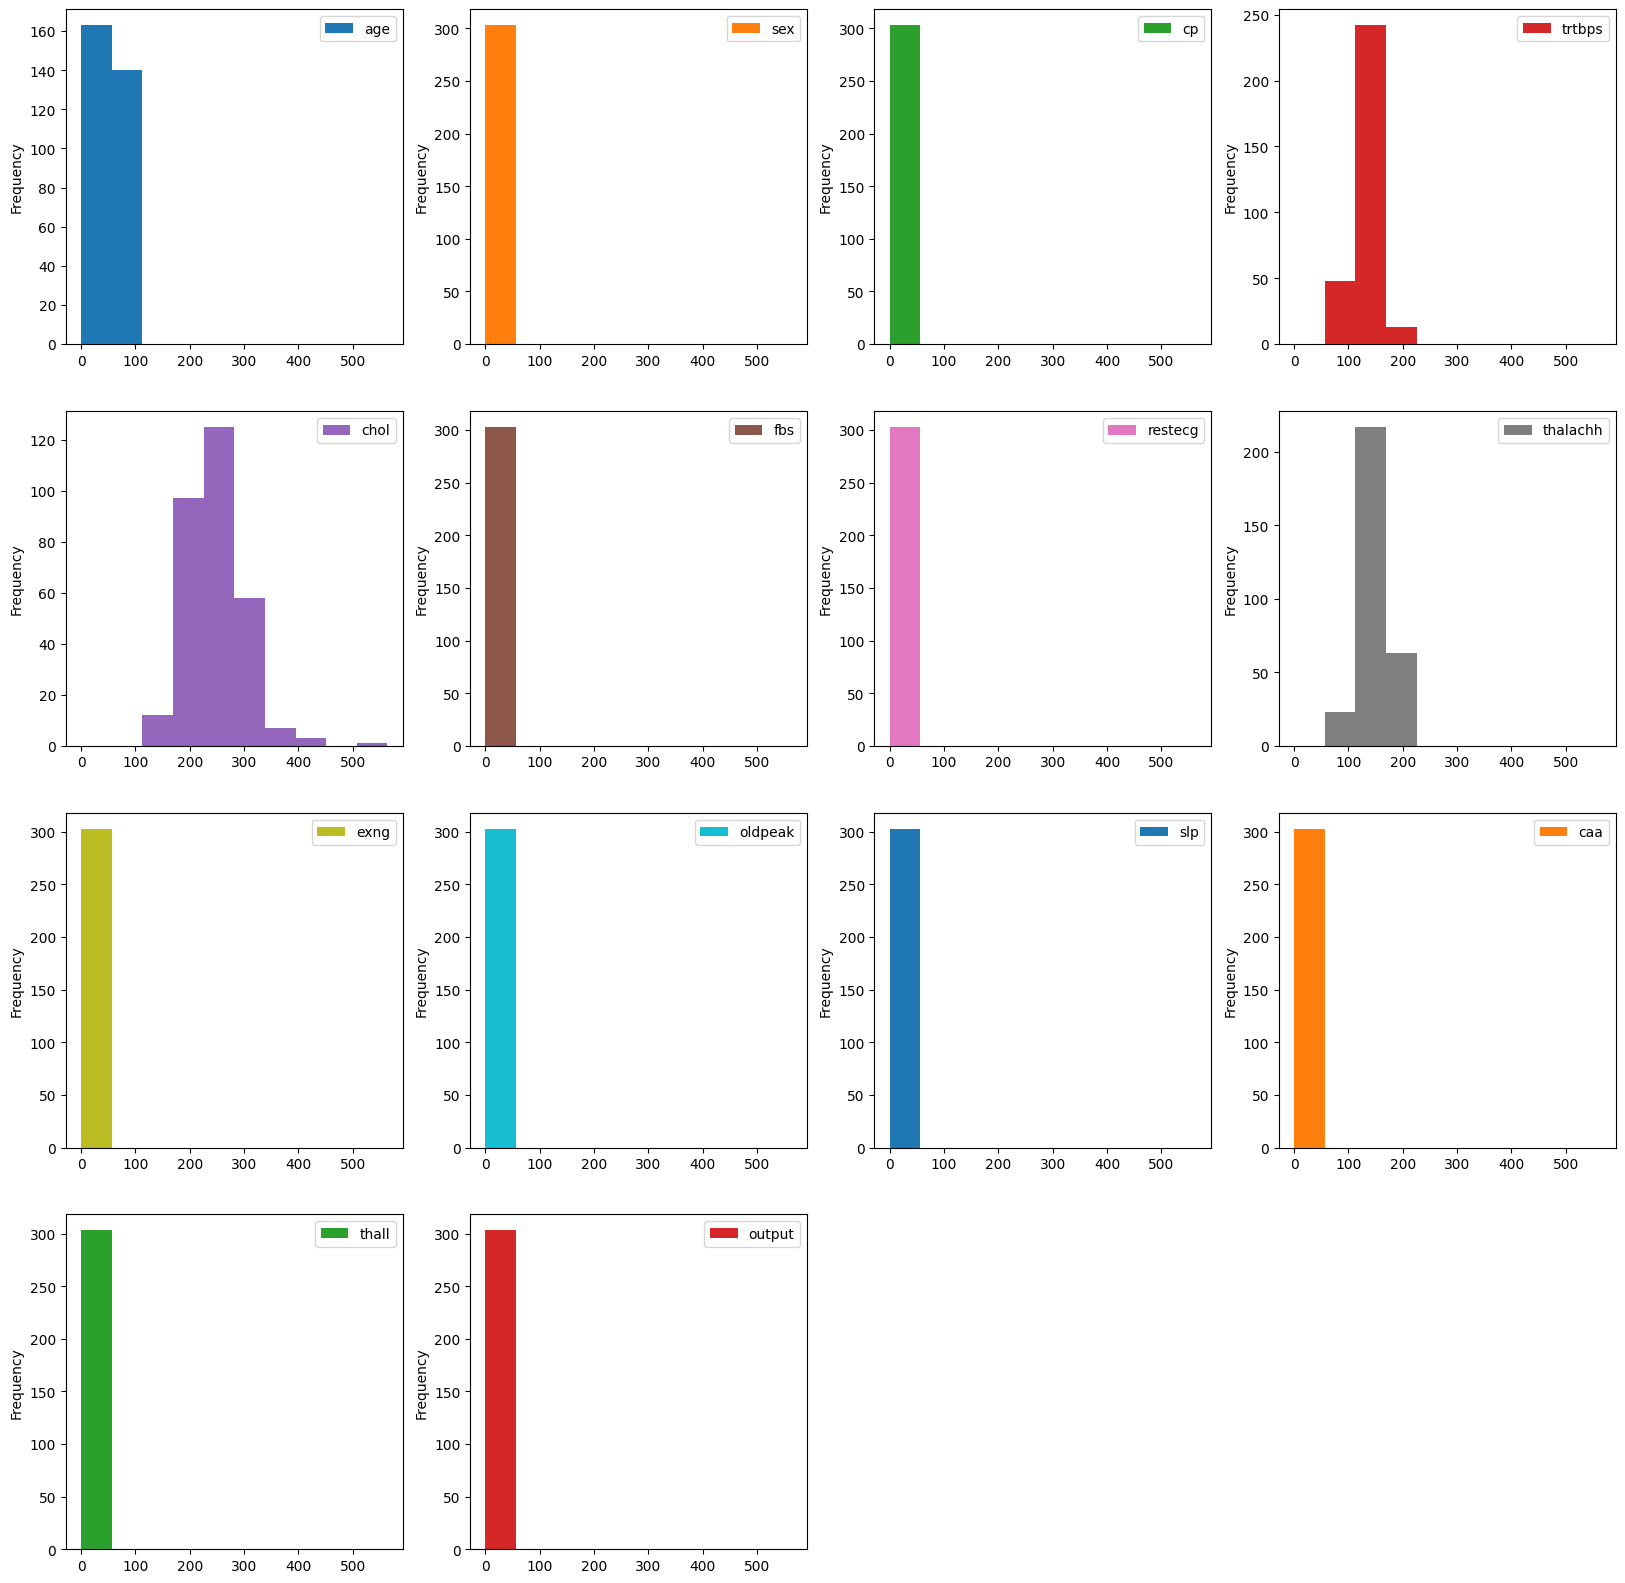

In [611]:
#plotting historgram plot to visualise the distribution of the data
plt.figure(figsize=(10,15))
data.plot(kind = 'hist', subplots = True, layout= (4,4), sharey = False, sharex = False)
plt.gcf().set_size_inches(20,20)
plt.show()

In [612]:
#check for skweness how concentrated the data is
data.skew()

age        -0.202463
sex        -0.791335
cp          0.484732
trtbps      0.713768
chol        1.143401
fbs         1.986652
restecg     0.162522
thalachh   -0.537410
exng        0.742532
oldpeak     1.269720
slp        -0.508316
caa         1.310422
thall      -0.476722
output     -0.179821
dtype: float64

In [613]:
#droping duplicates
data.drop_duplicates(keep = 'first', inplace = True)

In [614]:
'''#remedies of data distribution anomalities
1. Rescaling
2. Standadization
3. Normalisation
4. data imbalance
5. skweness and kurtosis
6. Binarisation'''

'#remedies of data distribution anomalities\n1. Rescaling\n2. Standadization\n3. Normalisation\n4. data imbalance\n5. skweness and kurtosis\n6. Binarisation'

In [615]:
'''#dropping the outliers in my data
def outlier_limit(data):
    q3,q1 = np.percentile(col,[75,25])
    iqr = q3-q1
    
    upper_limit = q3+1.5*iqr
    lower_limit = q1-1.5*iqr
    
    return upper_limit, lower_limit'''

'#dropping the outliers in my data\ndef outlier_limit(data):\n    q3,q1 = np.percentile(col,[75,25])\n    iqr = q3-q1\n\n    upper_limit = q3+1.5*iqr\n    lower_limit = q1-1.5*iqr\n\n    return upper_limit, lower_limit'

In [616]:
'''col = data.columns
for col in data:
    print('column.........................')
    UL,LL = outlier_limit(data[col])
    print('upper_limi.....................',UL)
    print('lower_limit....................',LL)
    Total_outlier = len(data.loc[data[col]>UL]) + len(data.loc[data[col]<LL])
    Percentage = (Total_outlier/len(data.index))*100
    print('Total_outlier....................',Total_outlier)
    print('percentage........................',percentage)
'''

"col = data.columns\nfor col in data:\n    print('column.........................')\n    UL,LL = outlier_limit(data[col])\n    print('upper_limi.....................',UL)\n    print('lower_limit....................',LL)\n    Total_outlier = len(data.loc[data[col]>UL]) + len(data.loc[data[col]<LL])\n    Percentage = (Total_outlier/len(data.index))*100\n    print('Total_outlier....................',Total_outlier)\n    print('percentage........................',percentage)\n"

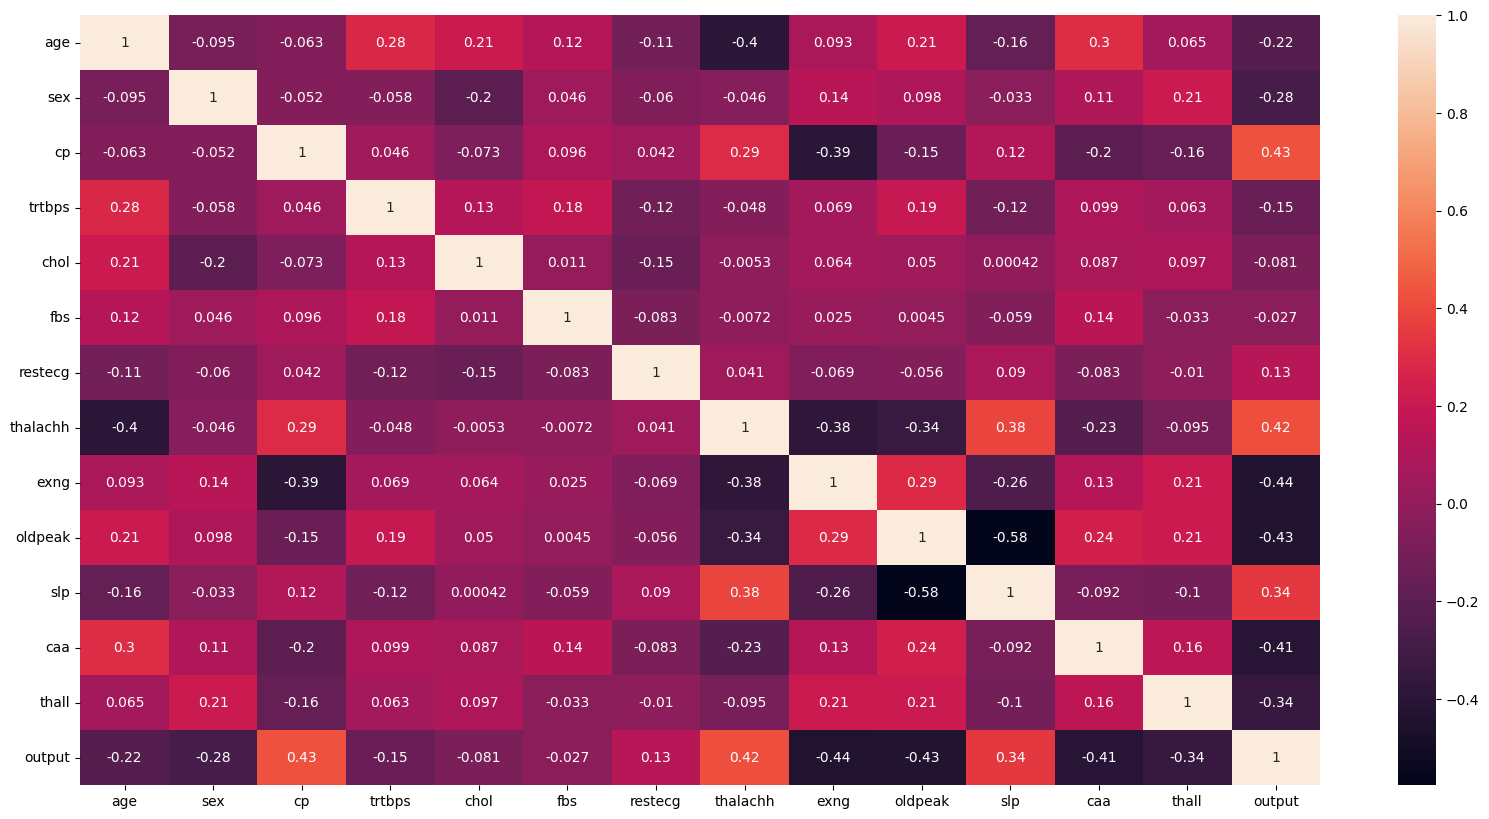

In [617]:
plt.figure(figsize = (20,10))
sb.heatmap(data.corr(), annot = True)
plt.show()

In [618]:
dataArr = data.values
X = dataArr[:,:-1]
y = dataArr[:,-1]

In [619]:
X

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]], shape=(302, 13))

In [620]:
y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [621]:
#Normalizing the input variable
from sklearn.preprocessing import Normalizer
scaler = Normalizer().fit(X)
normDf = scaler.transform(X)


In [622]:
#Adding data frame to the array normalised
NormDf = pd.DataFrame(X, columns =list(data)[:-1])

In [623]:
#calling the dataframe
NormDf.describe().T

,count,mean,std,min,25%,50%,75%,max
age,302.0,54.420530,9.047970,29.0,48.00,55.5,61.00,77.0
sex,302.0,0.682119,0.466426,0.0,0.00,1.0,1.00,1.0
cp,302.0,0.963576,1.032044,0.0,0.00,1.0,2.00,3.0
trtbps,302.0,131.602649,17.563394,94.0,120.00,130.0,140.00,200.0
chol,302.0,246.500000,51.753489,126.0,211.00,240.5,274.75,564.0
fbs,302.0,0.149007,0.356686,0.0,0.00,0.0,0.00,1.0
restecg,302.0,0.526490,0.526027,0.0,0.00,1.0,1.00,2.0
thalachh,302.0,149.569536,22.903527,71.0,133.25,152.5,166.00,202.0
exng,302.0,0.327815,0.470196,0.0,0.00,0.0,1.00,1.0
oldpeak,302.0,1.043046,1.161452,0.0,0.00,0.8,1.60,6.2


In [624]:
#adding back the output variable not normalized the the normalized data 
NormDf['Output']=data['output']

In [625]:
#calling back the dataframe with the added output
NormDf

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
298,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
299,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
300,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [626]:
NormDf = NormDf.dropna()
NormDf

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,Output
0,63.0,1.0,3.0,145.0,233.0,1.0,0.0,150.0,0.0,2.3,0.0,0.0,1.0,1.0
1,37.0,1.0,2.0,130.0,250.0,0.0,1.0,187.0,0.0,3.5,0.0,0.0,2.0,1.0
2,41.0,0.0,1.0,130.0,204.0,0.0,0.0,172.0,0.0,1.4,2.0,0.0,2.0,1.0
3,56.0,1.0,1.0,120.0,236.0,0.0,1.0,178.0,0.0,0.8,2.0,0.0,2.0,1.0
4,57.0,0.0,0.0,120.0,354.0,0.0,1.0,163.0,1.0,0.6,2.0,0.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
297,57.0,0.0,0.0,140.0,241.0,0.0,1.0,123.0,1.0,0.2,1.0,0.0,3.0,0.0
298,45.0,1.0,3.0,110.0,264.0,0.0,1.0,132.0,0.0,1.2,1.0,0.0,3.0,0.0
299,68.0,1.0,0.0,144.0,193.0,1.0,1.0,141.0,0.0,3.4,1.0,2.0,3.0,0.0
300,57.0,1.0,0.0,130.0,131.0,0.0,1.0,115.0,1.0,1.2,1.0,1.0,3.0,0.0


In [627]:
#seperating x and y variable for feature selection
NormDfArr = NormDf.values
X2=NormDfArr[:,:-1]
y2=NormDfArr[:,-1]

In [628]:
X2

array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]], shape=(301, 13))

In [629]:
y2

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [630]:
r'''#feature selection using RFE
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
numbfeatures = 6
model = LogisticRegression()
rfe = RFE(model,n_features_to_select = numbfeatures)
rfe.fit(X2,y2)'''

'#feature selection using RFE\nfrom sklearn.feature_selection import RFE\nfrom sklearn.linear_model import LogisticRegression\nnumbfeatures = 6\nmodel = LogisticRegression()\nrfe = RFE(model,n_features_to_select = numbfeatures)\nrfe.fit(X2,y2)'

In [631]:
r''''rfe.n_features_'''

"'rfe.n_features_"

In [632]:
r'''rfe.support_'''

'rfe.support_'

In [633]:
NormDf.columns

Index(['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh',
       'exng', 'oldpeak', 'slp', 'caa', 'thall', 'Output'],
      dtype='object')

In [634]:
r'''#working with the selected features for building modeling
dfrfe = NormDf[['sex', 'thalachh', 'exng','oldpeak', 'slp', 'caa', 'thall']]'''

"#working with the selected features for building modeling\ndfrfe = NormDf[['sex', 'thalachh', 'exng','oldpeak', 'slp', 'caa', 'thall']]"

In [635]:
r'''dfrfe'''

'dfrfe'

In [636]:
r'''dfrfe['output'] = NormDf['Output']'''

"dfrfe['output'] = NormDf['Output']"

In [637]:
#dfrfe

In [638]:
#sergregating the data for traintg, testing and modeling
dfrfeArr = NormDf.values
X1 = dfrfeArr[:,:-1]
y1 = dfrfeArr[:,-1]

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression




In [639]:
X1


array([[63.,  1.,  3., ...,  0.,  0.,  1.],
       [37.,  1.,  2., ...,  0.,  0.,  2.],
       [41.,  0.,  1., ...,  2.,  0.,  2.],
       ...,
       [68.,  1.,  0., ...,  1.,  2.,  3.],
       [57.,  1.,  0., ...,  1.,  1.,  3.],
       [57.,  0.,  1., ...,  1.,  1.,  2.]], shape=(301, 13))

In [640]:
#trainin and testing the imput nad output variables befor modelling
#seedSearch = [0,2,4,6,8,12]
#for seed in seedSearch:
seed = 2
X_train,X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.2, random_state =  seed)

#build  a model
model_lrg = LogisticRegression() #an empty model
# y_pred = model.predict(X_test)
#sending the model to school to learn the function of x required to predict y
model_lrg.fit(X_train,y_train)
y_pred = model_lrg.predict(X_test)
#get model accuracy
print(seed, ":", model_lrg.score(X_test,y_test))

2 : 0.8688524590163934


c:\Users\DELL\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [641]:
len(X_train)

240

In [642]:
len(X_test)

61

In [643]:
len(X_test)/len(dfrfe)*100

20.26578073089701

In [644]:
#y = f(X)

In [645]:
 model_lrg.predict(X_test)

array([1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1.,
       0., 1., 1., 1., 1., 0., 1., 1., 0., 1.])

In [646]:
y_test

array([1., 1., 1., 1., 0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1.,
       1., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0., 0., 0., 1., 1., 1.,
       1., 1., 1., 1., 0., 0., 1., 1., 0., 1.])

In [647]:
#Using Support Vector Machine
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
seedSearch1 = [0,2,4,6,8,12]
for seed1 in seedSearch:
    X_train,X_test, y_train, y_test = train_test_split(X1,y1, test_size = 0.2, random_state =  seed1)

# Initializing SVM classifier
    svm_classifier = SVC(kernel='linear', random_state=seed1)

# Training the SVM classifier
    svm_classifier.fit(X_train, y_train)

# Making predictions
    y_pred = svm_classifier.predict(X_test)

# Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print(seed1, ":", accuracy)

0 : 0.8360655737704918
2 : 0.8688524590163934
4 : 0.8852459016393442
6 : 0.9016393442622951
8 : 0.8524590163934426
12 : 0.8688524590163934


In [648]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

n_neighbors = [0,2,4,6,8]
for n_neighbors in n_neighbors:
    
# Initializing KNN classifier
    knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Training the KNN classifier
    knn_classifier.fit(X_train, y_train)

# Making predictions
    y_pred = knn_classifier.predict(X_test)

# Evaluating the model
    accuracy = accuracy_score(y_test, y_pred)
    print(n_neighbors,":", accuracy)







0 : 0.7049180327868853
2 : 0.7049180327868853
4 : 0.7049180327868853
6 : 0.7049180327868853
8 : 0.7049180327868853


In [649]:
joblib.dump(model_lrg, r"model/Logistics_Model.pkl")

['model/Logistics_Model.pkl']

In [650]:
joblib.dump(scaler, "model/normlz.pkl")

['model/normlz.pkl']